In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
file_path = "M:\\Users\\Katerina\\Experiments\\Results\\Didinium structure\\Quick imagej\\size_info.csv"
df = pd.read_csv(file_path)

In [3]:
axis_1_plus      = "axis_1_with_mouth (μm)"
axis_1           = "axis_1_without_mouth (μm)"
axis_2           = "axis_2_at_ciliary_band (μm)"
dist_cilia_bands = "distance_between_bands (μm)"
dist_new_band    = "new_band_from_mouth (μm)"
cilia_length     = "cilia_length (μm)"
comment          = "errors (μm)"
mouth_cup        = "mouth height (μm)"

aspect_ratio = df

In [4]:
color_normal = 'teal'
color_dividing = 'orange'

In [7]:
def plot_axis_1_plus(df):
    plt.figure(figsize=(6, 6))
    
    non_dividing = df[df[comment] != 'dividing']
    plt.plot(non_dividing.index, non_dividing[axis_1_plus], 'o', color=color_normal, label='Non-dividing')

    dividing = df[df[comment] == 'dividing']
    plt.plot(dividing.index, dividing[axis_1_plus], 'o', color=color_dividing, label='Dividing')

    plt.title('Major axis + mouth cup')
    plt.xlabel('cell id')
    plt.ylabel('Major axis + mouth cup (\u03BCm)')
    plt.ylim([100, 200])  
    plt.tight_layout()
    plt.legend()
    plt.show()

def plot_mouth_cup_height(df):
    plt.figure(figsize=(6, 6))
    
    non_dividing = df[df[comment] != 'dividing']
#     plt.plot(non_dividing.index, non_dividing[axis_1_plus]-non_dividing[axis_1], 'o', color=color_normal, label='Non-dividing')
    plt.plot(non_dividing.index, non_dividing[mouth_cup], 'o', color=color_normal, label='Non-dividing')
    
    dividing = df[df[comment] == 'dividing']
#     plt.plot(dividing.index, dividing[axis_1_plus]-dividing[axis_1], 'o', color=color_dividing, label='Dividing')
    plt.plot(dividing.index, dividing[mouth_cup], 'o', color=color_dividing, label='Dividing')
    plt.title('Mouth cup height')
    plt.xlabel('cell id')
    plt.ylabel('Mouth cup height (\u03BCm)')
    plt.ylim([5, 30])  
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    
def plot_axis_1(df):
    plt.figure(figsize=(6, 6))
    non_dividing = df[df[comment] != 'dividing']
    plt.plot(non_dividing.index, non_dividing[axis_1], 'o', color=color_normal, label='Non-dividing')

    dividing = df[df[comment] == 'dividing']
    plt.plot(dividing.index, dividing[axis_1], 'o', color=color_dividing, label='Dividing')
    plt.title('Major axis ')
    plt.xlabel('cell id')
    
    plt.ylabel('Major axis (\u03BCm)')
    plt.ylim([90, 200])  
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    
def plot_axis_2(df):
    plt.figure(figsize=(6, 6))
    non_dividing = df[df[comment] != 'dividing']
    plt.plot(non_dividing.index, non_dividing[axis_2], 'o', color=color_normal, label='Non-dividing')

    dividing = df[df[comment] == 'dividing']
    plt.plot(dividing.index, dividing[axis_2], 'o', color=color_dividing, label='Dividing')
    plt.title('Minor axis ')
    plt.xlabel('cell id')
    
    plt.ylabel('Minor axis (\u03BCm)')
    plt.ylim([60, 150])  
    plt.tight_layout()
    plt.legend()
    plt.show()

def plot_cilia_band_dist(df):
    plt.figure(figsize=(6, 6))
    
    non_dividing = df[df[comment] != 'dividing']
    plt.plot(non_dividing.index, non_dividing[dist_cilia_bands], 'o', color=color_normal, label='Non-dividing')


    dividing = df[df[comment] == 'dividing']
    plt.plot(dividing.index, dividing[dist_cilia_bands], 'o', color=color_dividing, label='Dividing - original band')
    plt.plot(dividing.index, dividing[dist_new_band], 'o', color="purple", label='Dividing - new band')

    plt.title('Distance of ciliary bands')
    plt.xlabel('cell id')
    
    plt.ylabel('Distance of ciliary bands (\u03BCm)')
    plt.ylim([30, 90])  
    plt.tight_layout()
    plt.legend()
    plt.show()

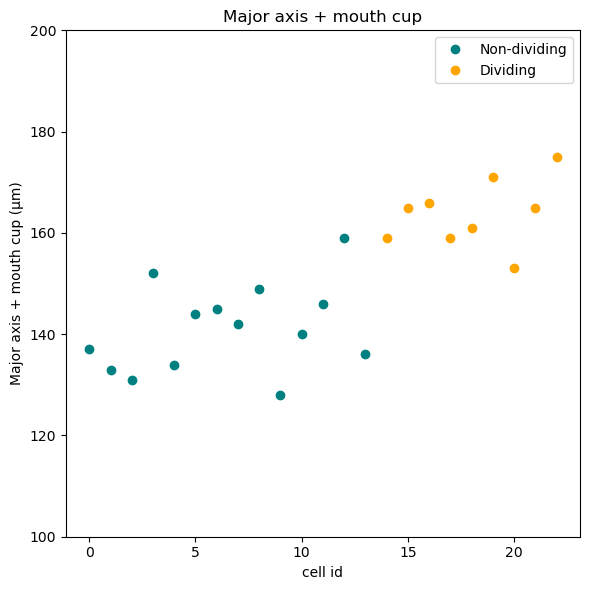

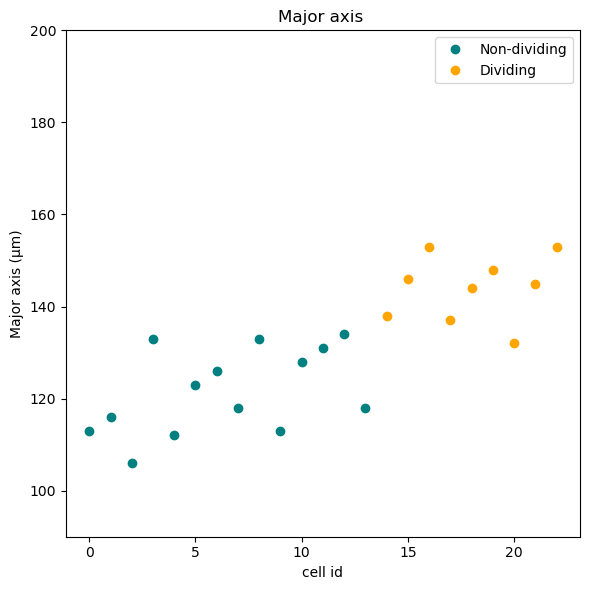

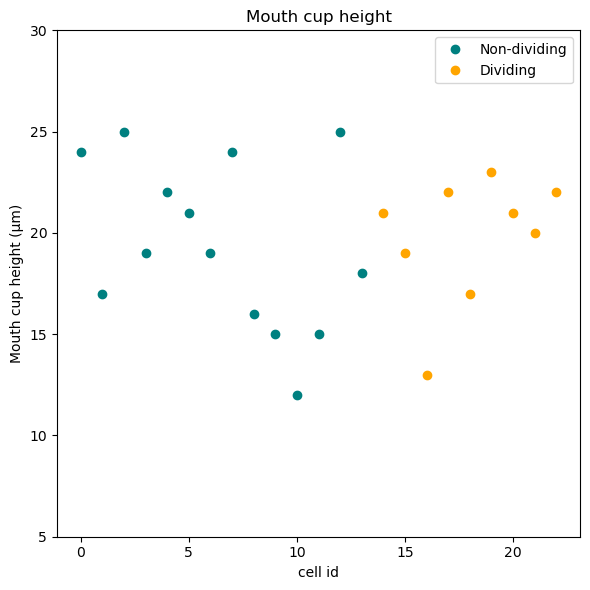

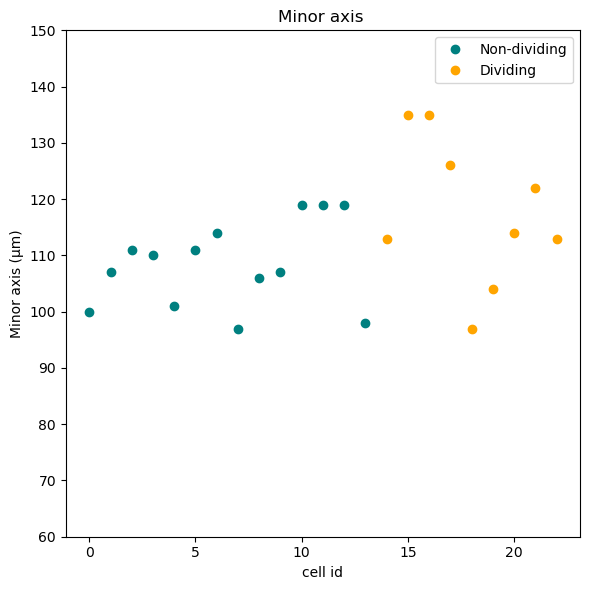

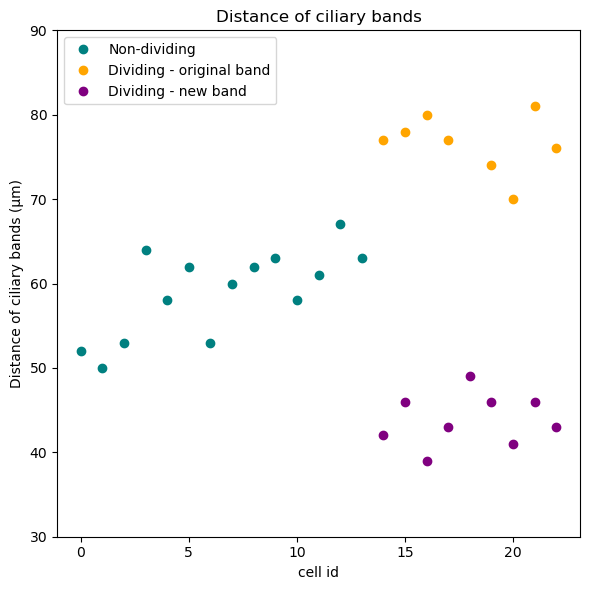

In [8]:
plot_axis_1_plus(df)
plot_axis_1(df)
plot_mouth_cup_height(df)
plot_axis_2(df)
plot_cilia_band_dist(df)

In [9]:
def plot_all_stripplot(df):
    # Create a figure with subplots
    fig, axs = plt.subplots(1, 4, figsize=(10, 4))  # Adjust figsize as needed

    # Plot for major axis
    violin_1 = sns.violinplot(y=axis_1, data=df, color='steelblue', ax=axs[0],  inner=None)
    for patch in violin_1.collections:
        patch.set_alpha(0.1)
    # Separate the points for dividing and non-dividing cells
    non_dividing = df[df[comment] != 'dividing']
    dividing = df[df[comment] == 'dividing']
    
    # Add strip plot for non-dividing cells
    sns.stripplot(y=axis_1, data=non_dividing, color=color_normal, size=8, jitter=0.02, label='Non-dividing', ax=axs[0])
    
    # Add strip plot for dividing cells
    sns.stripplot(y=axis_1, data=dividing, color=color_dividing, size=8, jitter=0.02, label='Dividing', ax=axs[0])
    
    axs[0].set_title('Major axis')
    axs[0].set_ylabel('Major axis (\u03BCm)')
    axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[0].minorticks_on()
    axs[0].legend().set_visible(False) 

    
    # Plot for minor axis
    violin_2 = sns.violinplot(y=axis_2, data=df, color='steelblue', ax=axs[1],  inner=None)
    for patch in violin_2.collections:
        patch.set_alpha(0.1)
    # Separate the points for dividing and non-dividing cells
    non_dividing = df[df[comment] != 'dividing']
    dividing = df[df[comment] == 'dividing']
    
    # Add strip plot for non-dividing cells
    sns.stripplot(y=axis_2, data=non_dividing, color=color_normal, size=8, jitter=0.02, label='Non-dividing',ax=axs[1])
    
    # Add strip plot for dividing cells
    sns.stripplot(y=axis_2, data=dividing, color=color_dividing, size=8, jitter=0.02, label='Dividing',ax=axs[1])
    
    axs[1].set_title('Minor axis')
    axs[1].set_ylabel('Minor axis (\u03BCm)')
    axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[1].minorticks_on()
    axs[1].legend().set_visible(False) 
#     plt.legend()



#     # Plot for mouth cup 
#     violin_3 = sns.violinplot(y=mouth_cup, data=df, color='steelblue', ax=axs[2],  inner=None)
#     for patch in violin_3.collections:
#         patch.set_alpha(0.1)
#     # Separate the points for dividing and non-dividing cells
#     non_dividing = df[df[comment] != 'dividing']
#     dividing = df[df[comment] == 'dividing']
    
#     # Add strip plot for non-dividing cells
#     sns.stripplot(y=mouth_cup, data=non_dividing, color=color_normal, size=8, jitter=0.02, label='Non-dividing',ax=axs[2])
    
#     # Add strip plot for dividing cells
#     sns.stripplot(y=mouth_cup, data=dividing, color=color_dividing, size=8, jitter=0.02, label='Dividing',ax=axs[2])
    
#     axs[2].set_title('Mouth cup height')
#     axs[2].set_ylabel('Mouth cup height (\u03BCm)')
#     axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)
#     axs[2].minorticks_on()
#     axs[2].legend().set_visible(False) 
# #     plt.legend()

     # Plot for ciliary band distances
    violin_4 = sns.violinplot(y=dist_cilia_bands, data=df, color='steelblue', ax=axs[3],  inner=None)
    for patch in violin_4.collections:
        patch.set_alpha(0.1)
    # Separate the points for dividing and non-dividing cells
    non_dividing = df[df[comment] != 'dividing']
    dividing = df[df[comment] == 'dividing']
    
    # Add strip plot for non-dividing cells
    sns.stripplot(y=dist_cilia_bands, data=non_dividing, color=color_normal, size=8, jitter=0.02, label='Non-dividing',ax=axs[3])
    
    # Add strip plot for dividing cells
    sns.stripplot(y=dist_cilia_bands, data=dividing, color=color_dividing, size=8, jitter=0.02, label='Dividing - original band',ax=axs[3])
    sns.stripplot(y=dist_new_band, data=dividing, color='purple', size=8, jitter=0.02, label='Dividing - new band',ax=axs[3])
    axs[3].set_title('Distance between bands')
    axs[3].set_ylabel('ciliary band distance (\u03BCm)')
    axs[3].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[3].minorticks_on()
    axs[3].legend().set_visible(False) 
#     plt.legend()
    
    
    plt.legend().set_visible(False)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


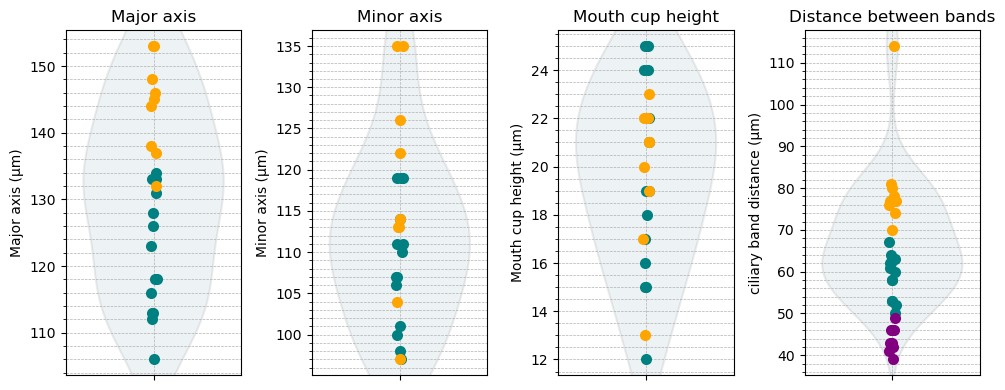

In [34]:
axis_1_plus      = "axis_1_with_mouth (μm)"
axis_1           = "axis_1_without_mouth (μm)"
axis_2           = "axis_2_at_ciliary_band (μm)"
dist_cilia_bands = "distance_between_bands (μm)"
dist_new_band    = "new_band_from_mouth (μm)"
cilia_length     = "cilia_length (μm)"
comment          = "errors (μm)"

plot_all_stripplot(df)

In [56]:
estimated_error = 3

def plot_axis_1_plus(df):
    plt.figure(figsize=(6, 6))
    
    non_dividing = df[df[comment] != 'dividing']
    plt.errorbar(non_dividing.index, non_dividing[axis_1_plus], yerr=estimated_error, fmt='o', color=color_normal, label='Non-dividing',capsize=5)

    dividing = df[df[comment] == 'dividing']
    plt.errorbar(dividing.index, dividing[axis_1_plus], yerr=estimated_error, fmt='o', color=color_dividing, label='Dividing',capsize=5)

    plt.title('Major axis + mouth cup')
    plt.xlabel('cell id')
    plt.ylabel('Major axis + mouth cup (\u03BCm)')
    plt.ylim([100, 200])  
    plt.tight_layout()
    plt.legend()
    plt.show()

def plot_mouth_cup_height(df):
    plt.figure(figsize=(6, 6))
    
    non_dividing = df[df[comment] != 'dividing']
    plt.errorbar(non_dividing.index, non_dividing[axis_1_plus] - non_dividing[axis_1], yerr=estimated_error, fmt='o', color=color_normal, label='Non-dividing',capsize=5)

    dividing = df[df[comment] == 'dividing']
    plt.errorbar(dividing.index, dividing[axis_1_plus] - dividing[axis_1], yerr=estimated_error, fmt='o', color=color_dividing, label='Dividing',capsize=5)

    plt.title('Mouth cup height')
    plt.xlabel('cell id')
    plt.ylabel('Mouth cup height (\u03BCm)')
    plt.ylim([3, 30])  
    plt.tight_layout()
    plt.legend()
    plt.show()

def plot_axis_1(df):
    plt.figure(figsize=(6, 6))
    non_dividing = df[df[comment] != 'dividing']
    plt.errorbar(non_dividing.index, non_dividing[axis_1], yerr=estimated_error, fmt='o', color=color_normal, label='Non-dividing',capsize=5)

    dividing = df[df[comment] == 'dividing']
    plt.errorbar(dividing.index, dividing[axis_1], yerr=estimated_error, fmt='o', color=color_dividing, label='Dividing',capsize=5)

    plt.title('Major axis ')
    plt.xlabel('cell id')
    plt.ylabel('Major axis (\u03BCm)')
    plt.ylim([90, 170])  
    plt.tight_layout()
    plt.legend()
    plt.show()

def plot_axis_2(df):
    plt.figure(figsize=(6, 6))
    non_dividing = df[df[comment] != 'dividing']
    plt.errorbar(non_dividing.index, non_dividing[axis_2], yerr=estimated_error, fmt='o', color=color_normal, label='Non-dividing',capsize=5)

    dividing = df[df[comment] == 'dividing']
    plt.errorbar(dividing.index, dividing[axis_2], yerr=estimated_error, fmt='o', color=color_dividing, label='Dividing',capsize=5)

    plt.title('Minor axis ')
    plt.xlabel('cell id')
    plt.ylabel('Minor axis (\u03BCm)')
    plt.ylim([60, 150])  
    plt.tight_layout()
    plt.legend()
    plt.show()

def plot_cilia_band_dist(df):
    plt.figure(figsize=(6, 6))
    
    non_dividing = df[df[comment] != 'dividing']
    plt.errorbar(non_dividing.index, non_dividing[dist_cilia_bands], yerr=estimated_error, fmt='o', color=color_normal, label='Non-dividing',capsize=5)

    dividing = df[df[comment] == 'dividing']
    plt.errorbar(dividing.index, dividing[dist_cilia_bands], yerr=estimated_error, fmt='o', color=color_dividing, label='Dividing - original band',capsize=5)
    plt.errorbar(dividing.index, dividing[dist_new_band], yerr=estimated_error, fmt='o', color='purple', label='Dividing - new band',capsize=5)

    plt.title('Distance of ciliary bands')
    plt.xlabel('cell id')
    plt.ylabel('Distance of ciliary bands (\u03BCm)')
    plt.ylim([30, 90])  
    plt.tight_layout()
    plt.legend()
    plt.show()

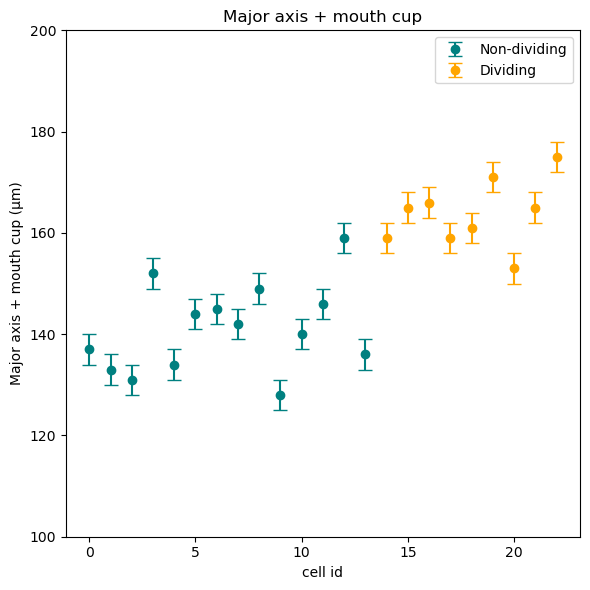

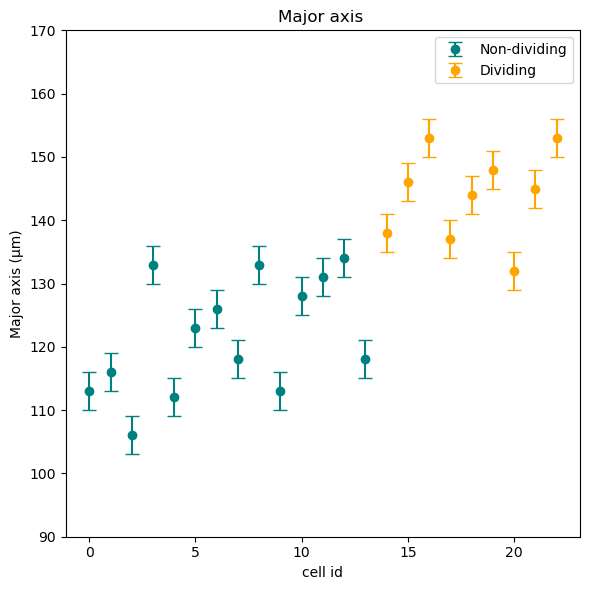

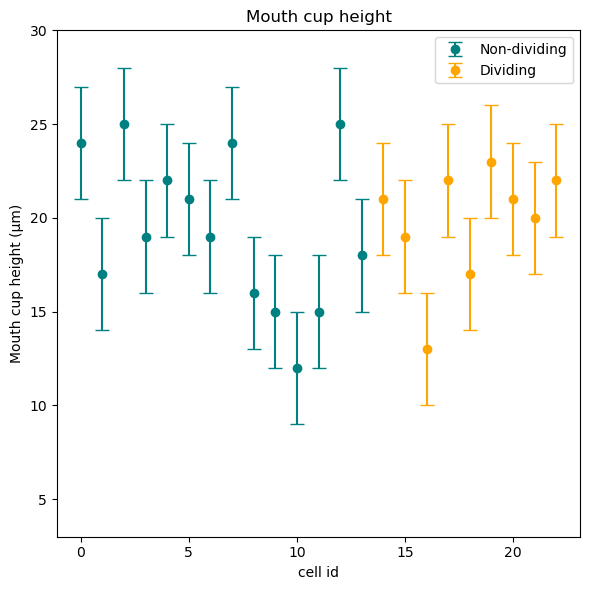

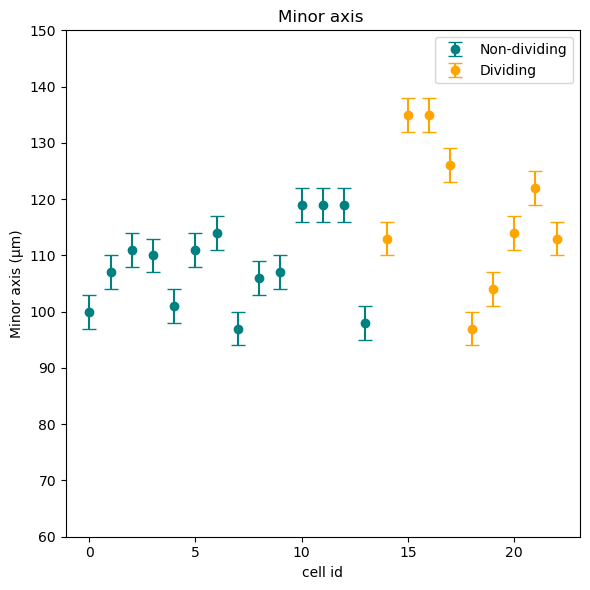

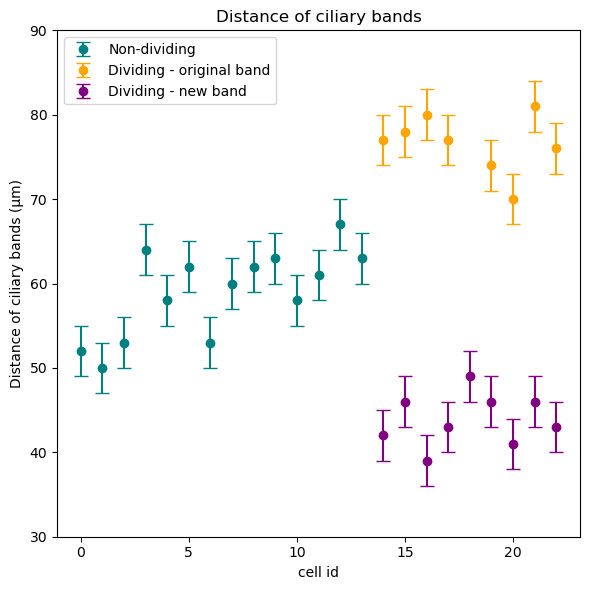

In [57]:
plot_axis_1_plus(df)
plot_axis_1(df)
plot_mouth_cup_height(df)
plot_axis_2(df)
plot_cilia_band_dist(df)

In [85]:
def plot_aspect_ratio(df):
    plt.figure(figsize=(3, 2),dpi=300)
    
    non_dividing = df[df[comment] != 'dividing']
#     plt.plot(non_dividing.index, non_dividing[axis_1]/non_dividing[axis_2], 'o', color=color_normal, label='Non-dividing')
    plt.errorbar(non_dividing.index, non_dividing[axis_1]/non_dividing[axis_2], yerr=0.1, fmt='o', color=color_normal, label='Non-dividing',capsize=5)
    m = np.mean(non_dividing[axis_1]/non_dividing[axis_2])
    print(m)
    std_m = np.std(non_dividing[axis_1]/non_dividing[axis_2])
    error = np.sqrt((m/non_dividing[axis_1]*0.1)**2 + (m/non_dividing[axis_2]*0.1)**2)
    print(std_m)
    
#     dividing = df[df[comment] == 'dividing']
#     plt.plot(dividing.index, dividing[axis_1]/dividing[axis_2], 'o', color=color_dividing, label='Dividing')
# #     plt.plot(dividing.index, dividing[mouth_cup], 'o', color=color_dividing, label='Dividing')
#     plt.errorbar(dividing.index, dividing[axis_1]/dividing[axis_2], yerr=0.1, fmt='o', color=color_dividing, label='Dividing',capsize=5)

#     plt.title('Cell axis ratio')
    plt.xlabel('cell id')
    plt.ylabel('Cell aspect ration')
    plt.ylim([0.7, 1.6])  
    \
    plt.tight_layout()
#     plt.legend()
    plt.show()

1.1238806717553564
0.07455782588575109


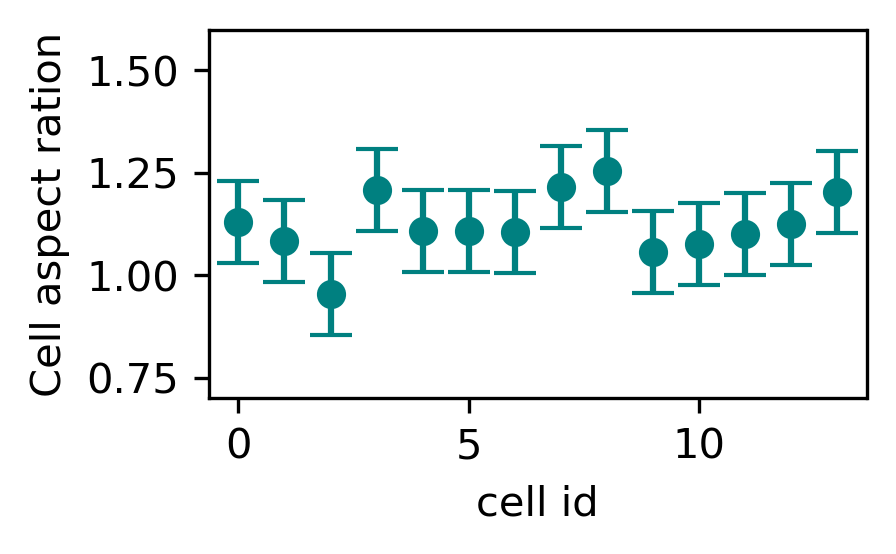

In [86]:
plot_aspect_ratio(df)

In [ ]:
def plot_aspect_ratio_2(df):
    plt.figure(figsize=(6, 6))
    non_dividing = df[df[comment] != 'dividing']
    plt.errorbar(non_dividing.index, non_dividing[axis_2], yerr=estimated_error, fmt='o', color=color_normal, label='Non-dividing',capsize=5)

    dividing = df[df[comment] == 'dividing']
    plt.errorbar(dividing.inde
                 x, dividing[axis_2], yerr=estimated_error, fmt='o', color=color_dividing, label='Dividing',capsize=5)

    plt.title('Minor axis ')
    plt.xlabel('cell id')
    plt.ylabel('Minor axis (\u03BCm)')
    plt.ylim([60, 150])  
    plt.tight_layout()
    plt.legend()
    plt.show()

In [81]:
def plot_band_distance_norm(df):
    plt.figure(figsize=(3, 2),dpi=300)
    
    non_dividing = df[df[comment] != 'dividing']
#     plt.plot(non_dividing.index, non_dividing[axis_1]/non_dividing[axis_2], 'o', color=color_normal, label='Non-dividing')
    plt.errorbar(non_dividing.index, non_dividing[dist_cilia_bands]/non_dividing[axis_1], yerr=0.1, fmt='o', color="black", label='Non-dividing',capsize=5)
    m = np.mean(non_dividing[dist_cilia_bands]/non_dividing[axis_1])
    print(m)
    std_m = np.std(non_dividing[dist_cilia_bands]/non_dividing[axis_1])
    error = np.sqrt((m/non_dividing[dist_cilia_bands]*0.1)**2 + (m/non_dividing[axis_1]*0.1)**2)
    print(std_m)
#     dividing = df[df[comment] == 'dividing']
#     plt.plot(dividing.index, dividing[axis_1]/dividing[axis_2], 'o', color=color_dividing, label='Dividing')
# #     plt.plot(dividing.index, dividing[mouth_cup], 'o', color=color_dividing, label='Dividing')
#     plt.errorbar(dividing.index, dividing[axis_1]/dividing[axis_2], yerr=0.1, fmt='o', color=color_dividing, label='Dividing',capsize=5)

#     plt.title('Cell axis ratio')
    plt.xlabel('cell id')
    plt.ylabel('band distance / major axis')
    plt.ylim([0.2, 0.8])  
    
    plt.tight_layout()
#     plt.legend()
    plt.show()

0.48570041852255247
0.037338912421295924


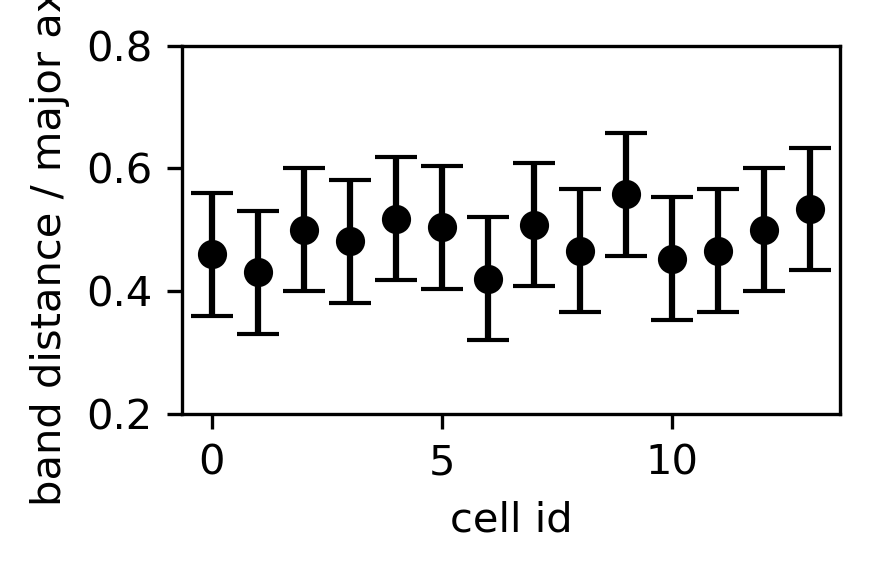

In [82]:
plot_band_distance_norm(df)

In [139]:
def plot_all_stripplot(df):
    # Create a figure with subplots
    fig, axs = plt.subplots(1, 3, figsize=(7, 3), dpi =300)  # Adjust figsize as needed

    # Plot for major axis
    violin_1 = sns.violinplot(y=axis_1, data=df, color='steelblue', ax=axs[0],  inner=None)
    for patch in violin_1.collections:
        patch.set_alpha(0.1)
    # Separate the points for dividing and non-dividing cells
    non_dividing = df[df[comment] != 'dividing']
    #dividing = df[df[comment] == 'dividing']
    
    # Add strip plot for non-dividing cells
    sns.stripplot(y=axis_1, data=non_dividing, color="r", size=8, jitter=0.02, label='Non-dividing', ax=axs[0])
    m_1 = np.mean(non_dividing[axis_1])
    std_1 = np.std(non_dividing[axis_1])
    print(m_1,std_1 , std_1/m_1)
    # Add strip plot for dividing cells
    #sns.stripplot(y=axis_1, data=dividing, color=color_dividing, size=8, jitter=0.02, label='Dividing', ax=axs[0])
    
    axs[0].set_title('major axis')
    axs[0].set_ylabel('\u03B1 (\u03BCm)')
    axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[0].minorticks_on()
    axs[0].legend().set_visible(False) 

    
    # Plot for minor axis
    violin_2 = sns.violinplot(y=axis_2, data=df, color='steelblue', ax=axs[1],  inner=None)
    for patch in violin_2.collections:
        patch.set_alpha(0.1)
    # Separate the points for dividing and non-dividing cells
    non_dividing = df[df[comment] != 'dividing']
    #dividing = df[df[comment] == 'dividing']
    
    # Add strip plot for non-dividing cells
    sns.stripplot(y=axis_2, data=non_dividing, color="goldenrod", size=8, jitter=0.02, label='Non-dividing',ax=axs[1])
    
    # Add strip plot for dividing cells
    #sns.stripplot(y=axis_2, data=dividing, color=color_dividing, size=8, jitter=0.02, label='Dividing',ax=axs[1])
    m_2 = np.mean(non_dividing[axis_2])
    std_2 = np.std(non_dividing[axis_2])
    print(m_2,std_2 , std_2/m_2)
    
    axs[1].set_title('minor axis')
    axs[1].set_ylabel('\u03B2 (\u03BCm)')
    axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[1].minorticks_on()
    axs[1].legend().set_visible(False) 
#     plt.legend()



     # Plot for ciliary band distances
    violin_4 = sns.violinplot(y=dist_cilia_bands, data=df, color='steelblue', ax=axs[2],  inner=None)
    for patch in violin_4.collections:
        patch.set_alpha(0.1)
    # Separate the points for dividing and non-dividing cells
    non_dividing = df[df[comment] != 'dividing']
    #dividing = df[df[comment] == 'dividing']
    
    # Add strip plot for non-dividing cells
    sns.stripplot(y=dist_cilia_bands, data=non_dividing, color="green", size=8, jitter=0.02, label='Non-dividing',ax=axs[2])
    
    m_3 = np.mean(non_dividing[dist_cilia_bands])
    std_3 = np.std(non_dividing[dist_cilia_bands])
    print(m_3,std_3 , std_3/m_3)
    # Add strip plot for dividing cells
    #sns.stripplot(y=dist_cilia_bands, data=dividing, color=color_dividing, size=8, jitter=0.02, label='Dividing - original band',ax=axs[3])
    #sns.stripplot(y=dist_new_band, data=dividing, color='purple', size=8, jitter=0.02, label='Dividing - new band',ax=axs[3])
    axs[2].set_title('band spacing')
    axs[2].set_ylabel('d (\u03BCm)')
    axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[2].minorticks_on()
    axs[2].legend().set_visible(False) 
#     plt.legend()
    
    
    plt.legend().set_visible(False)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


121.71428571428571 8.883601034881002 0.07298733244620542
108.5 7.355755763831671 0.06779498399844858
59.0 4.9856938190329 0.08450328506835424


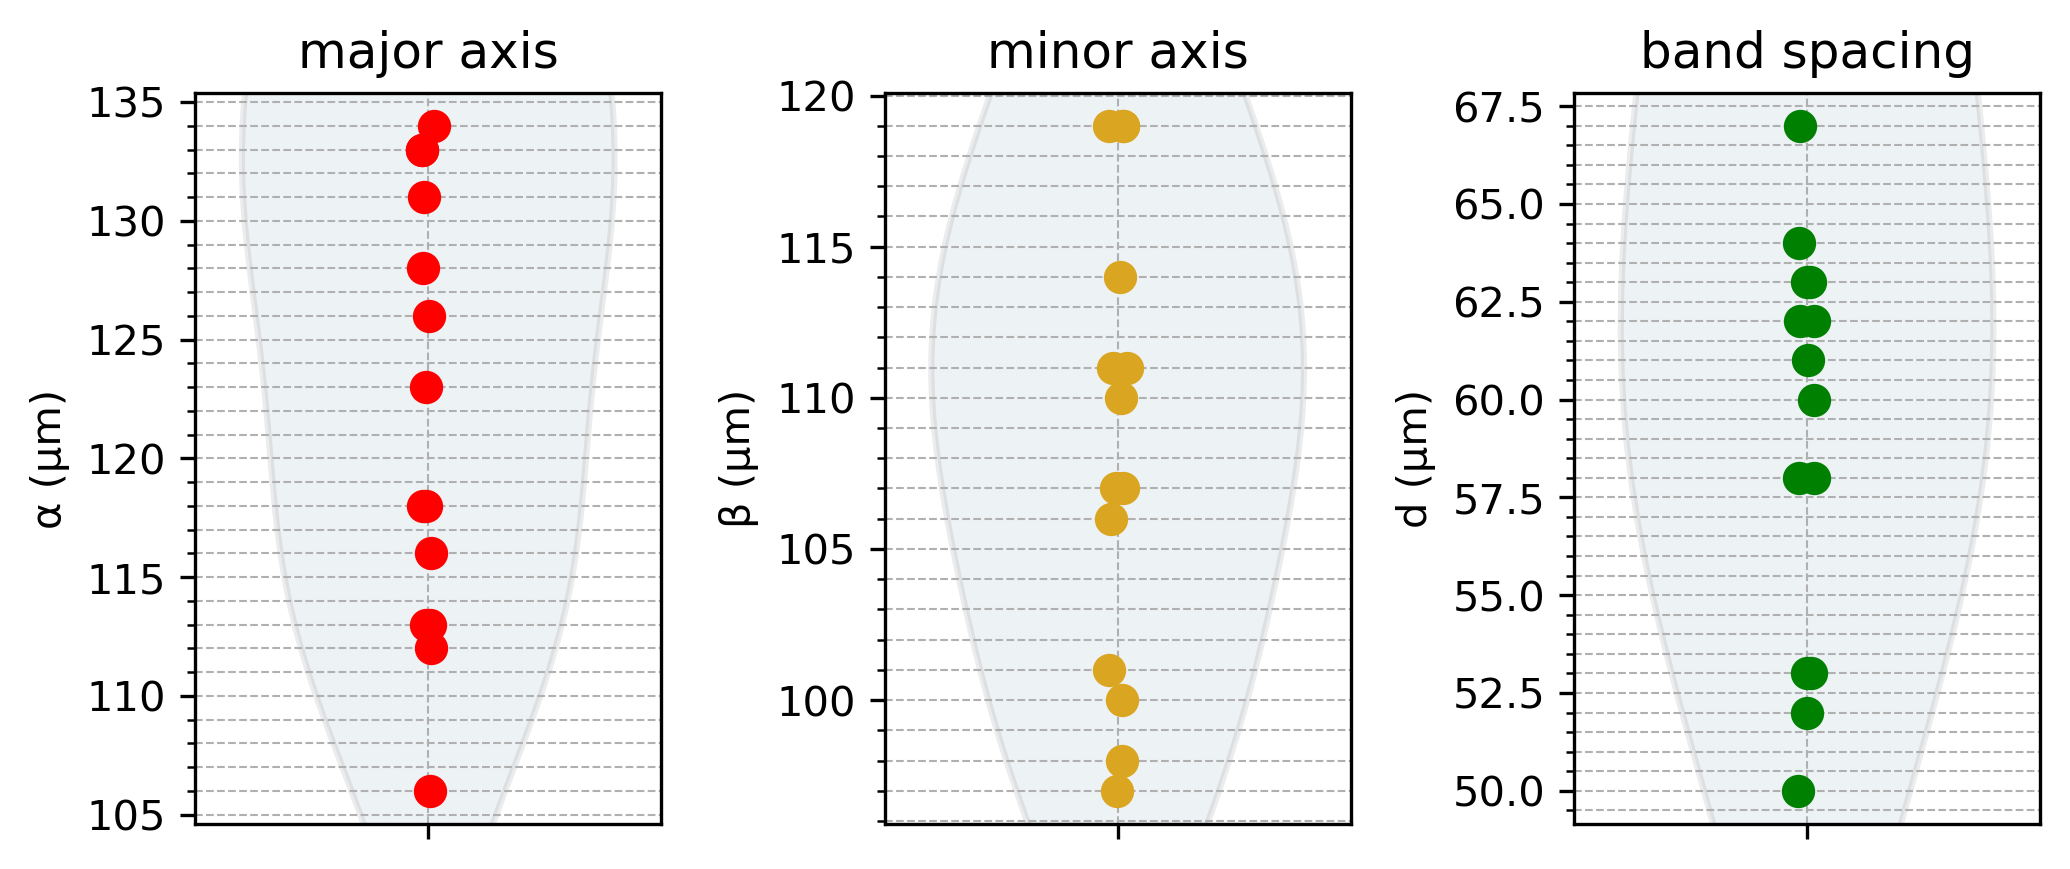

In [140]:
plot_all_stripplot(df)

<Figure size 640x480 with 0 Axes>

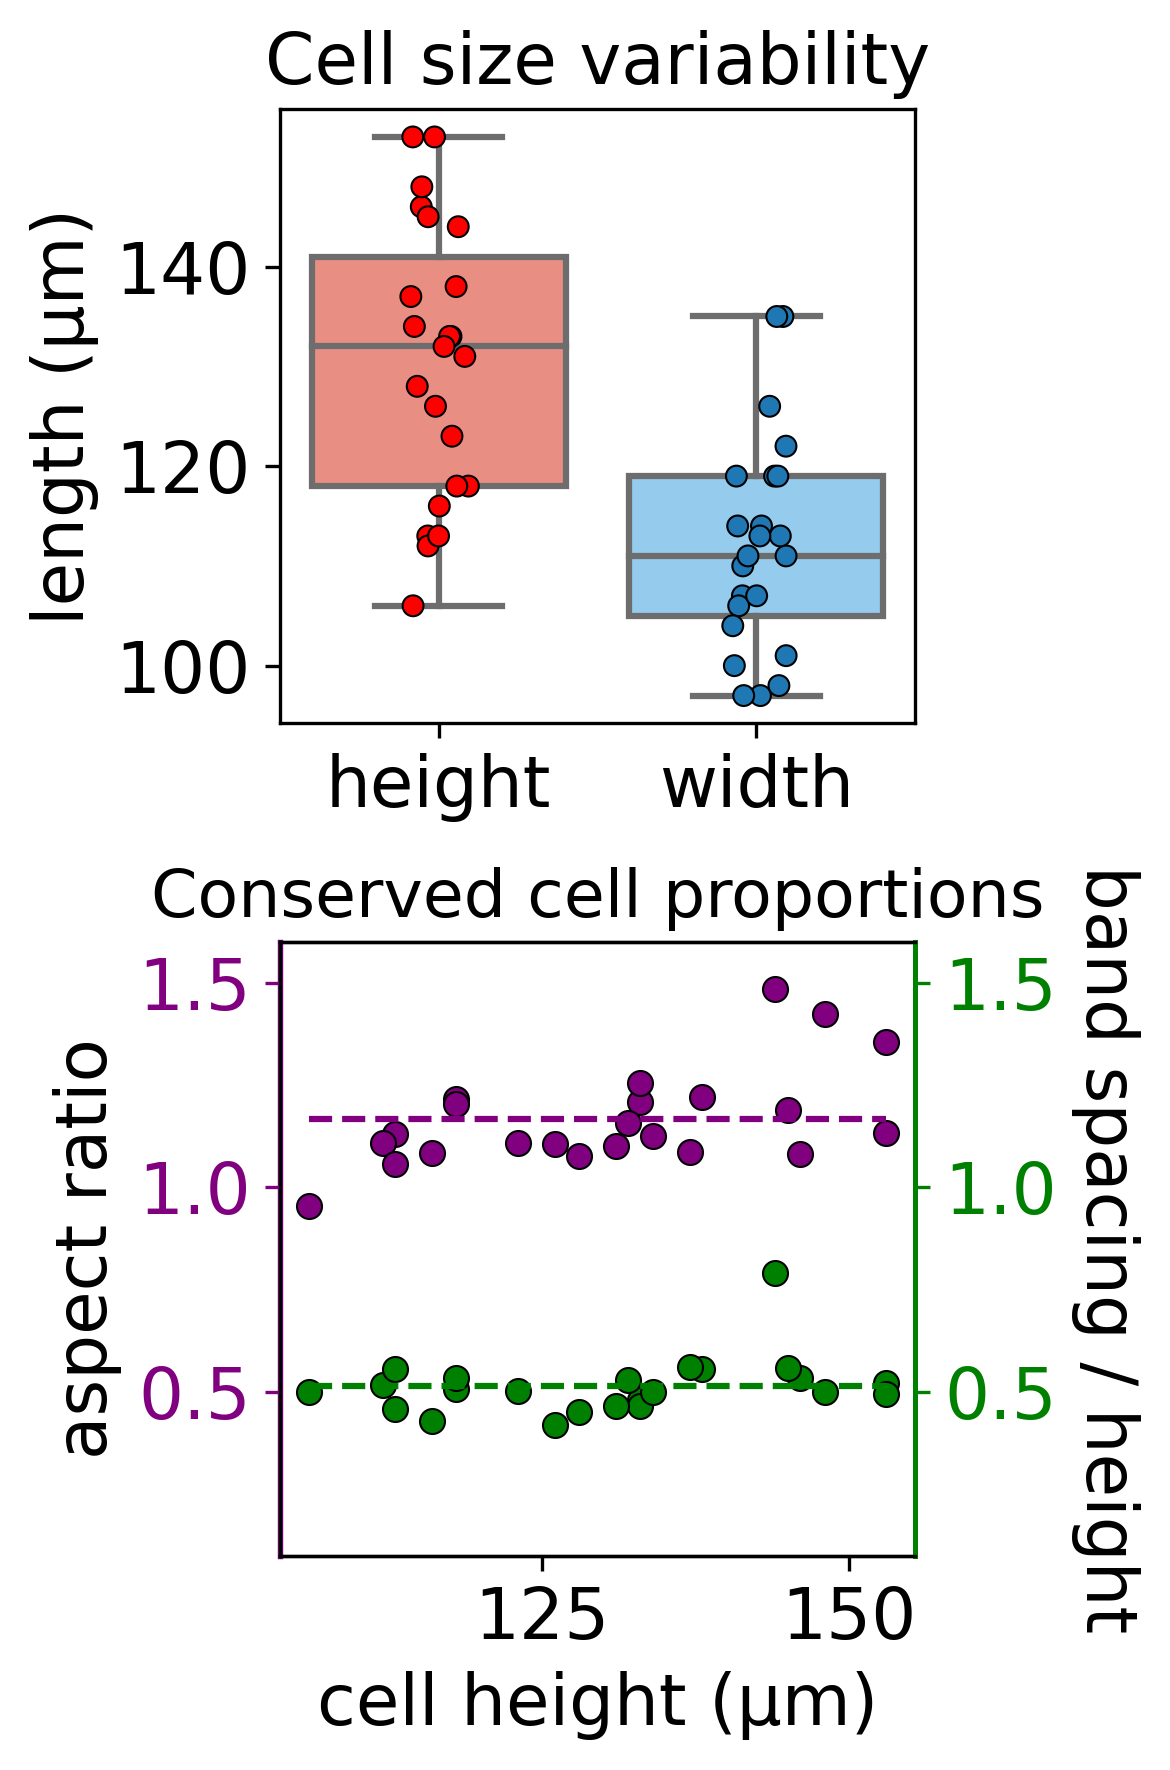

1.1680738860081146
0.11859342813763599


In [98]:

file_path = "M:\\Users\\Katerina\\Experiments\\Results\\Didinium structure\\Quick imagej\\size_info.csv"
data = pd.read_csv(file_path)

axis_1 = data["axis_1_without_mouth (\u03bcm)"]
axis_2 = data["axis_2_at_ciliary_band (\u03bcm)"]
dist_cilia_bands = data["distance_between_bands (\u03bcm)"]

# Compute derived values
aspect_ratios = axis_1 / axis_2  # Aspect ratio
normalized_heights = (axis_1 - axis_1.min()) / (axis_1.max() - axis_1.min())  # Normalized height
plt.subplots_adjust(hspace=10) 
# Set up the figure
fig, axs = plt.subplots(2, 1, figsize=(4, 6), dpi=300)

# Panel 1: Size variability
# Violin plot for cell heights

# sns.boxplot(data=[axis_1, axis_2], palette="muted", ax=axs[0])

sns.boxplot(data=[axis_1, axis_2], palette=["salmon", "lightskyblue"], ax=axs[0], showfliers=False)

# Add jittered points with softer colors and reduced alpha
sns.stripplot(data=[axis_1, axis_2], palette=["red", "tab:blue"], ax=axs[0], 
              jitter=True, size=5, edgecolor="black", linewidth=0.5, alpha=1)

fontsize_1 = 17
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(["height", "width"], fontsize=fontsize_1)
axs[0].set_title("Cell size variability", fontsize=fontsize_1)
axs[0].set_ylabel("length (\u03bcm)", fontsize=fontsize_1)
axs[0].tick_params(axis='both', labelsize=fontsize_1) 
# Annotate with statistics
mean_width = axis_2.mean()
std_width = axis_2.std()
mean_without_mouth = axis_1.mean()
std_without_mouth = axis_1.std()
# axs[0].annotate(f"Mean \u00b1 SD: {mean_without_mouth:.2f} \u00b1 {std_without_mouth:.2f}", xy=(0, mean_without_mouth), xytext=(0.2, mean_without_mouth + 10),
#                  arrowprops=dict(facecolor='black', arrowstyle='->'))
# axs[0].annotate(f"Mean \u00b1 SD: {mean_width:.2f} \u00b1 {std_width:.2f}", xy=(1, mean_width), xytext=(1.2, mean_width + 10),
#                  arrowprops=dict(facecolor='black', arrowstyle='->'))


# Add statistics as text below the x-axis tick labels
# axs[0].text(0, -0.1, f"Mean ± SD:\n{mean_without_mouth:.2f} ± {std_without_mouth:.2f}",
#             ha='center', va='top', transform=axs[0].transAxes, fontsize=10, color="darkred")
# axs[0].text(1, -0.1, f"Mean ± SD:\n{mean_width:.2f} ± {std_width:.2f}",
#             ha='center', va='top', transform=axs[0].transAxes, fontsize=10, color="darkblue")

# # Adjust x-axis and titles
# axs[0].set_xticks([0, 1])
# axs[0].set_xticklabels(["Axis 1", "Axis 2"])
# axs[0].set_title("Cell Size Variability")
# axs[0].set_ylabel("Height (μm)")

# Panel 2: Conservation of aspect ratio and band spacing
# Scatter plot for aspect ratio vs. cell height
axs[1].scatter(axis_1, aspect_ratios, color="purple", edgecolor="black", linewidth=0.5,label="aspect ratio")
axs[1].set_title("Conserved cell proportions", fontsize=16)
axs[1].set_xlabel("cell height (\u03bcm)", fontsize=fontsize_1)
axs[1].set_ylabel("aspect ratio", fontsize=fontsize_1)
axs[1].set_ylim(0.1, 1.6)
axs[1].tick_params(axis='both', labelsize=fontsize_1) 
axs[1].tick_params(axis='y', colors='purple')
axs[1].spines['left'].set_linewidth(1.3)
axs[1].spines['left'].set_color('purple')

ax2 = axs[1].twinx()
ax2.scatter(axis_1, dist_cilia_bands / axis_1, color="green",edgecolor="black", linewidth=0.5, label="band spacing / height")
ax2.set_ylabel("band spacing / height", rotation=270, labelpad=20, fontsize=fontsize_1)
ax2.set_ylim(0.1, 1.6)
ax2.tick_params(axis='y', labelsize=fontsize_1)  
ax2.spines['right'].set_color('green')  # Set the color of the right spine (y-axis line)
ax2.spines['right'].set_linewidth(1.2)  # Adjust the thickness of the y-axis line
ax2.tick_params(axis='y', colors='green') 
# axs[1].legend()

# Add trendlines for conservation
mean_aspect_ratio = np.mean(aspect_ratios)
mean_band_spacing = np.mean(dist_cilia_bands / axis_1)
axs[1].hlines(mean_aspect_ratio, xmin=axis_1.min(), xmax=axis_1.max(), colors='purple', linestyles='--', label="Mean Aspect Ratio")
ax2.hlines(mean_band_spacing, xmin=axis_1.min(), xmax=axis_1.max(), colors='green', linestyles='--', label="Mean Band Spacing")
# Adjust layout and show
plt.tight_layout()
plt.savefig("M:\\Users\\Katerina\\docs proposal plan\\size_variability", dpi=300, bbox_inches='tight', pad_inches=0.1)
   
plt.show()
print( np.mean(aspect_ratios))
print( np.std(aspect_ratios))

In [103]:
print(np.mean(dist_cilia_bands / axis_1))

print(np.std(dist_cilia_bands / axis_1))


0.5154028467188485
0.0707923178023774


In [104]:
dist_cilia_bands.shape

(23,)